# Feature selection of RNA data

## 1. Data uploading

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
path ='../../Data/RNA_data.csv'
data = pd.read_csv(path)
data = data.set_index('gene_name')
data.head(5)

C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,2

,EA595454,EA595455,EA595473,EA595500,EA595522,EA595529,EA595564,EA595565,EA595585,EA595597,...,RCC_18_T_SCR,RCC_21_T_SCR,RCC_27_T_SCR,RCC_41_T_SCR,RCC_50_T_SCR,RCC_73_T_SCR,RCC_90_T_SCR,RCC_93_T_SCR,RCC_96_T_SCR,RCC_99_T_SCR
gene_name,,,,,,,,,,,,,,,,,,,,,
Target,R,R,R,NR,R,NR,R,NR,NR,R,...,NR,NR,NR,NR,NR,NR,NR,R,NR,NR
5S_rRNA,21.02628588,21.02628588,21.02628588,21.02628588,21.02628588,21.02628588,21.02628588,21.02628588,21.02628588,21.02628588,...,21.0380433,21.0380433,21.0380433,21.0380433,21.0380433,21.0380433,21.0380433,21.0380433,21.0380433,21.0380433
7SK,36.97789665,38.12815927,35.37440093,37.80029684,37.5097892,36.60526205,36.16085227,37.94504384,37.64673466,37.56479376,...,36.88139035,35.71998105,35.02565774,35.78530167,39.21060161,36.33872887,38.24891513,35.88481158,35.28377564,36.69454567
A1BG,30.21645496,29.34838892,31.17895807,29.69901116,30.122608,32.54655258,31.30297042,29.9168435,29.0823196,31.43614589,...,35.1473236,27.11867773,27.11867773,29.45035991,31.07950971,30.95440674,33.11014903,32.88028258,30.65871464,27.11867773
A1BG-AS1,25.84274915,18.91196024,25.11020389,25.35700279,21.79811937,26.60450377,26.25569925,27.01195494,18.91196024,28.22317662,...,26.21497324,22.68825156,26.7552442,26.45758046,25.42522533,27.310879,26.79319909,25.65984218,27.53389014,17.78872565


In [11]:
# It is mandatory to transpose the dataframe to have column names as headers
data = data.T
# Show first 5 lines ofthe final data
data.head(5)

gene_name,Target,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
EA595454,R,21.02628588,36.97789665,30.21645496,25.84274915,31.39821353,36.61405997,26.75106439,25.152064,20.97668844,...,32.28675,30.8623,30.95496,29.6633,31.48822,26.19071,31.87735,34.28152,34.37428,32.56508
EA595455,R,21.02628588,38.12815927,29.34838892,18.91196024,34.13197197,36.02410771,25.6975332,24.58101224,20.97668844,...,32.09417,31.50998,30.72878,30.18319,32.3164,25.22639,32.87571,33.46655,33.98977,32.85827
EA595473,R,21.02628588,35.37440093,31.17895807,25.11020389,32.16738112,38.55749949,26.17008255,24.31437374,20.97668844,...,30.49705,30.02328,30.51006,30.2556,32.1714,27.58695,32.27022,34.27569,33.41178,31.91425
EA595500,NR,21.02628588,37.80029684,29.69901116,25.35700279,32.64212068,37.35232025,26.40006117,26.40541182,20.97668844,...,31.75347,29.37345,31.37995,30.41511,32.24742,28.76248,32.53061,33.55862,34.75891,33.12681
EA595522,R,21.02628588,37.5097892,30.122608,21.79811937,33.38868939,38.9186805,24.93551967,22.26297212,20.97668844,...,31.81948,31.00603,31.94143,31.39193,31.84661,28.5435,33.05299,34.52781,33.27887,32.51443


In [12]:
X = data.iloc[:,1:43894] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
Y = []

# Como la columna target esta compuesta por valores categóricos ordinales (R y NR) convertimos en valores numéricos (R=0, NR=1) 
for i in range (len(data)):
    if data.Target[i]=='R':
        Y.append(1)
    else:
        Y.append(0) 

## 2. Feature selection methods:
### a. Forward selection.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

In [20]:
import mlxtend.feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import mlxtend.feature_selection

In [23]:
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=(3,15),
          forward=True,
          floating=False,
          scoring = 'f1')

In [24]:
sfs.fit(X, Y)
sfs.k_feature_names_  

C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


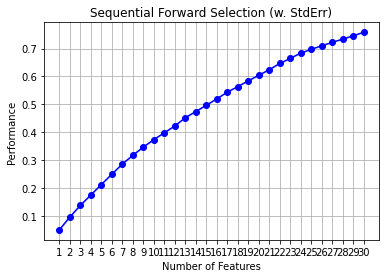

In [8]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### b. Backward elimination

In [ ]:
# Took too long to execute
sbs = SFS(LinearRegression(),
         k_features=(3,15),
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, Y)
sbs.k_feature_names_

### c. Bidirectional elimination

In [9]:
sffs = SFS(LinearRegression(),
         k_features=(3,30),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, Y)
sffs.k_feature_names_

('AC005307.1',
 'ATP5G2P1',
 'DLGAP4',
 'EIF4A1P9',
 'FAM172BP',
 'FAM224A',
 'GJA9',
 'GPR155',
 'GYPE',
 'IL25',
 'KLHL5',
 'LANCL1-AS1',
 'LEMD1',
 'PCMT1',
 'RP11-120J4.1',
 'RP11-20G6.3',
 'RP11-349G13.2',
 'RP11-374M1.2',
 'RP11-536C10.21',
 'RP11-95G17.2',
 'RP11-96O20.4',
 'RP5-827C21.1',
 'RPS12P26',
 'SDR42E1',
 'SNORD113-5',
 'TARBP2',
 'TRAV41',
 'TRIM43B',
 'VN2R17P',
 'XPC')

C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


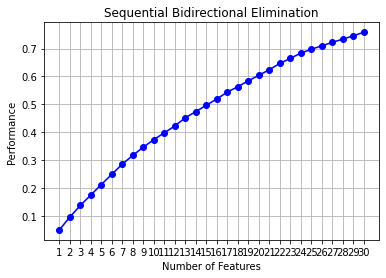

In [10]:
fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Bidirectional Elimination')
plt.grid()
plt.show()

In [11]:
print("Features from forward selection")
print(sfs.k_feature_names_ )
print("Features from bidirectional elimination")
print(sffs.k_feature_names_)

Features from forward selection
('AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC')
Features from bidirectional elimination
('AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC')
